# Assignment 01
Name:  Sukhneet Kaur

Class: INST447  

Section:  0101

## EX 01
(20pts total) 

Find 2 datasets that when combined answer a question that could not be answered by a single dataset alone. This is similar to Worksheet 03 where we wanted to know if ride counts were impacted by the weather.

Download the files and save them in the folder named "data" that is in the same folder as this file.

Please provide a link to where you found these files (the landing page for each file):  
(5pts each file)  

1)  https://catalog.data.gov/dataset/parking-violations-issued-fiscal-year-2016 

2)  https://catalog.data.gov/dataset/2016-green-taxi-trip-data  

Tell me what question you intend to answer with these data: (10pts)

Question: Did the number of parking violations increase the use of taxis in New York City during the year of 2016? 

In [73]:
# Standard Includes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os
import datetime
%matplotlib inline

## EX02
(15 pts)  

Now open and clean the first data file. All of the data types need to make sense. All columns should be descriptively named. There needs to be an index.

In [74]:
violations = pd.read_csv('/Users/Sukhi/Desktop/Assignment 1/data/Parking_Violations_Issued_2016.csv')

/Users/Sukhi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,18,20,21,22,23,29,30,31,32,34,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
violations.tail()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
10626894,8359500927,FFM1969,NY,PAS,06/08/2016,38,SUBN,TOYOT,T,25590,...,BLUE,NaN,2013.0,NaN,0.0,04 2,38-Failure to Display Muni Rec,NaN,NaN,NaN
10626895,8359500940,2482082,IN,PAS,06/08/2016,51,VAN,FRUEH,T,73980,...,WHITE,NaN,0.0,NaN,0.0,04 2,51-Sidewalk,NaN,NaN,NaN
10626896,8359500952,65919JW,NY,COM,06/08/2016,52,VAN,FRUEH,T,0,...,BROWN,NaN,2007.0,NaN,0.0,04 2,52-Intersection,NaN,NaN,NaN
10626897,8359500964,68718MG,NY,COM,06/08/2016,82,PICK,DODGE,T,0,...,WH,NaN,2015.0,NaN,0.0,04 2,82-Unaltered Commerc Vehicle,NaN,NaN,NaN
10626898,8359500976,FZX4974,NY,PAS,06/08/2016,38,4DSD,HONDA,T,0,...,BK,NaN,2013.0,NaN,0.0,04 2,38-Failure to Display Muni Rec,NaN,NaN,NaN


In [76]:
violations = violations.filter(['Issue Date',], axis = 1)

In [77]:
violations['Issue Date']=pd.to_datetime(violations['Issue Date'], infer_datetime_format=True)

In [78]:
violations = violations[(violations['Issue Date'] >=  '2016-01-01') & (violations['Issue Date'] <= '2016-12-31')]

In [79]:
parking_violations = violations.groupby(['Issue Date'])['Issue Date'].count()

In [80]:
violations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872621 entries, 542 to 10626898
Data columns (total 1 columns):
Issue Date    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 74.4 MB


In [81]:
parking_violations = parking_violations.to_frame('Violations Count').reset_index()

In [82]:
parking_violations = parking_violations.rename(index=str, columns={"Issue Date": "Violation Issue Date"})

In [83]:
parking_violations.head()

,Violation Issue Date,Violations Count
0,2016-01-01,5202
1,2016-01-02,16881
2,2016-01-03,7825
3,2016-01-04,36725
4,2016-01-05,37500


## EX03
(15 pts)

Now open and clean the second data file. All of the data types need to make sense. All columns should be descriptively named. There needs to be an index.

In [84]:
taxi = pd.read_csv('/Users/Sukhi/Desktop/Assignment 1/data/2016_Green_Taxi_Trip_Data.csv')

In [85]:
taxi.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,PULocationID,DOLocationID
0,2,01/01/2016 12:29:24 AM,01/01/2016 12:39:36 AM,N,1,-73.928642,40.680611,-73.924278,40.698044,1,...,0.5,1.86,0.0,NaN,0.3,11.16,1,1.0,NaN,NaN
1,2,01/01/2016 12:19:39 AM,01/01/2016 12:39:18 AM,N,1,-73.952675,40.723175,-73.923920,40.761379,1,...,0.5,0.00,0.0,NaN,0.3,16.80,2,1.0,NaN,NaN
2,2,01/01/2016 12:19:33 AM,01/01/2016 12:39:48 AM,N,1,-73.971611,40.676105,-74.013161,40.646072,1,...,0.5,4.45,0.0,NaN,0.3,22.25,1,1.0,NaN,NaN
3,2,01/01/2016 12:22:12 AM,01/01/2016 12:38:32 AM,N,1,-73.989502,40.669579,-74.000648,40.689034,1,...,0.5,0.00,0.0,NaN,0.3,14.80,2,1.0,NaN,NaN
4,2,01/01/2016 12:24:01 AM,01/01/2016 12:39:22 AM,N,1,-73.964729,40.682854,-73.940720,40.663013,1,...,0.5,0.00,0.0,NaN,0.3,13.30,2,1.0,NaN,NaN


In [86]:
taxi['lpep_pickup_datetime']=pd.to_datetime(taxi['lpep_pickup_datetime'],format = '%m/%d/%Y %H:%M:%S %p')

In [87]:
taxi= taxi.filter(['lpep_pickup_datetime'], axis = 1)

In [88]:
taxi['lpep_pickup_datetime'] = taxi['lpep_pickup_datetime'].apply(pd.datetools.normalize_date)

/Users/Sukhi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.core.datetools.normalize_date is deprecated. Please use pandas._libs.tslib.normalize_date instead.
  """Entry point for launching an IPython kernel.


In [89]:
taxi_rides = taxi.groupby(['lpep_pickup_datetime'])['lpep_pickup_datetime'].count()

In [90]:
taxi_rides = taxi_rides.to_frame('Rides Count').reset_index()

In [91]:
taxi_rides = taxi_rides.rename(index=str, columns={"lpep_pickup_datetime": "Taxi Pick Up"})

In [92]:
taxi_rides.head()

,Taxi Pick Up,Rides Count
0,2016-01-01,64396
1,2016-01-02,46958
2,2016-01-03,44270
3,2016-01-04,43740
4,2016-01-05,42342


## EX04
(10 pts)

Combine the two files so that I have a clean data set that would allow someone to answer the question you said you were building a dataset for in EX01. 

In [93]:
result = pd.concat([parking_violations, taxi_rides], axis=1)

In [94]:
result.head()

,Violation Issue Date,Violations Count,Taxi Pick Up,Rides Count
0,2016-01-01,5202.0,2016-01-01,64396
1,2016-01-02,16881.0,2016-01-02,46958
10,2016-01-11,40250.0,2016-01-11,41603
100,2016-04-10,9124.0,2016-04-10,56024
101,2016-04-11,37435.0,2016-04-11,42216


## EX05
(20 pts)  
Nobody likes undocumented data.  
Create the metadata for your DataFrame. Think back to the imports-85.names file from WK04 and the kind of information that it provides. It answers questions like, but not limited to:  
* How many rows are in your DataFrame? 
* How many columns are in your DataFrame? 
* What are the names of the columns? 
* What kind of data are in each column?
* Is there any missing values? Where and how many?


In [96]:
txt = open('data/metadata.names', 'r')
print(txt.read())

1. Title: Result Database

2. Number of Instances: 366

3. Number of Attributes: 4 total

4. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. Violation Issue Date:     01/01/2016 - 12/31/2016.
  2. Violations Count:         continuous from 0 to 700000.
  3. Taxi Pick Up:             01/01/2016 - 12/31/2016.
  4. Rides Count:              continuous from 0 to 700000.


5. Missing Attribute Values: (denoted by "?")
   Attribute #:   Number of instances missing a value:
   None 




## EX06
(20 pts)  
  
Explain how your DataFrame (preferably with pretty pictures, but numbers and words are good too) answers your question.

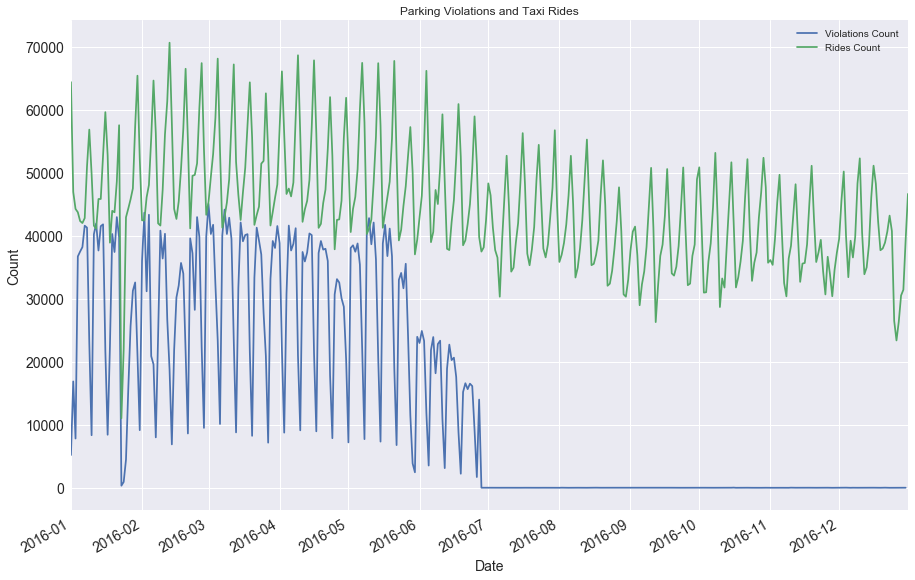

In [106]:
ax = result.plot(x='Taxi Pick Up', kind='line', title ="Parking Violations and Taxi Rides", figsize=(15, 10), legend=True, fontsize=14)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

The number of violations issued did affect the use of taxis slightly. 